# Train predictor exploratory analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path


/home/hdheli/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


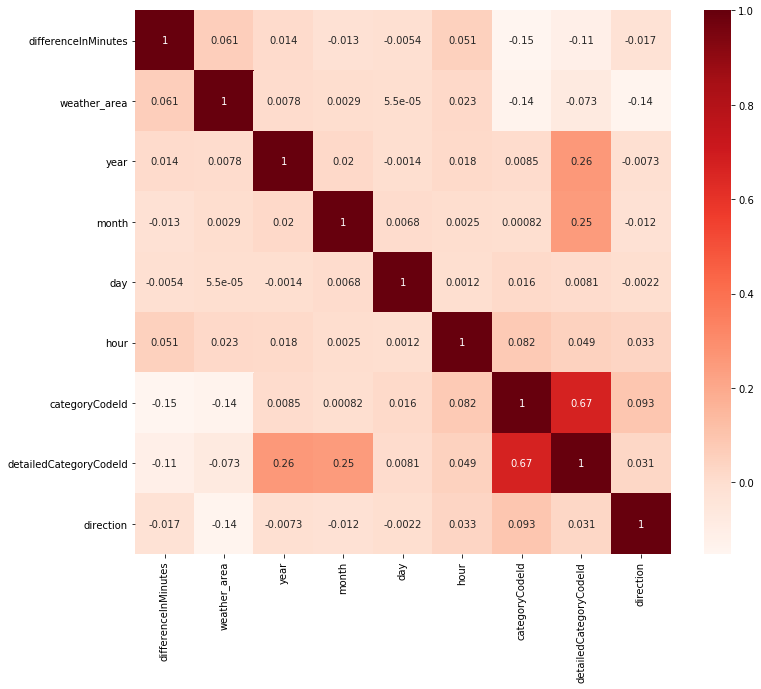

In [3]:
# Load the traindata (weather data not present)

trains = pd.read_csv("../data/clean/trains.csv")
                                      
plt.figure(figsize=(12, 10))  
cor = trains.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)        

Let's make a data frame that can only rows with causes, and make another heat map

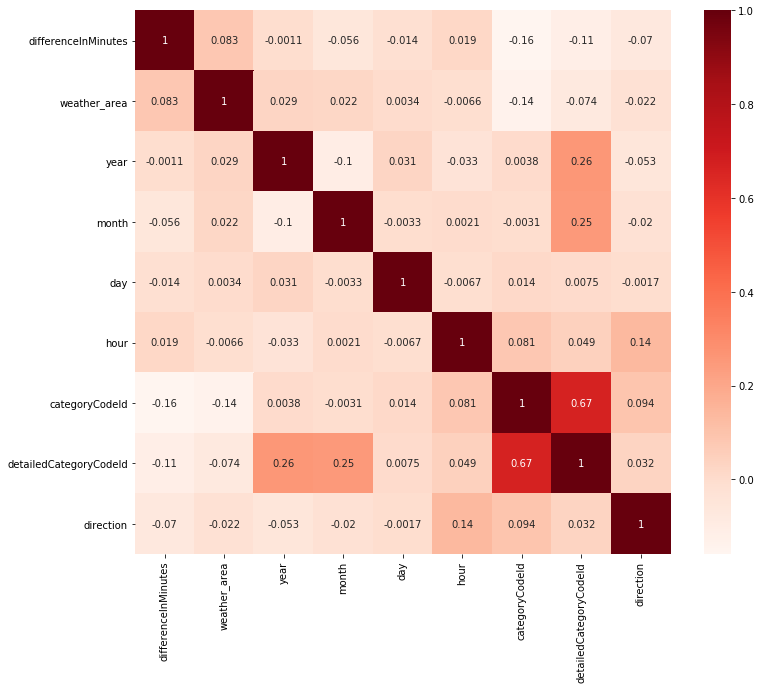

In [4]:
trains_causes = trains.dropna(axis=0)
# trains_causes.to_csv('../data/clean/cause_rows_new.csv')
plt.figure(figsize=(12, 10))  
cor_causes = trains_causes.corr()
sns.heatmap(cor_causes, annot=True, cmap=plt.cm.Reds)                    


Let's investigate the causes in detail

In [5]:
import json 
f = open('../utils/detailed-cause-category-codes.json',)
cause_json = json.load(f)
cause_codes = trains_causes.detailedCategoryCodeId.unique()
cause_names = {}


for code in cause_codes:
    for cause in cause_json:
        if code == cause['id']:
            cause_names[int(code)]=cause['detailedCategoryName']
cause_names            

{101: 'Junakohtaus, edellä kulkeva juna tai ohitus',
 102: 'Konflikti kapasiteetissa',
 86: 'Kalustovika',
 151: 'Ratainfran laiteviat',
 164: 'Matkustajajunan pysähtymisajan ylitys',
 160: 'Ratatyöt (ennakoidut työt nopeusrajoituksineen)',
 147: 'Aikataulusuunnittelun virhe',
 165: 'Ilkivalta, asiaton radalla liikkuminen',
 120: 'Allejäänti (eläin)',
 104: 'Edessä oleva kalusto tukkii radan',
 106: 'Liikenteenhoitovirhe',
 119: 'Allejäänti (ihminen)',
 143: 'Junan muodostamisen viivästyminen (kaikki liikenne)',
 166: 'Muu syy',
 159: 'Ratarikko / este radalla',
 87: 'Kalustosta johtuva nopeuden alennus',
 125: 'Poikkeukselliset sääolosuhteet',
 149: 'Junan lähtöön liittyvä odotus',
 157: 'Pitkäaikaiset nopeusrajoitukset',
 92: 'Veturivika',
 155: 'Sähkönjakeluhäiriö',
 152: 'Tietojärjestelmäviat',
 100: 'Yhteysliikenteen odotus (jatkoyhteydet)',
 124: 'Ylimääräinen pysähdys',
 126: 'Lehtikeli tai muu liukkaus',
 93: 'Vetovoimasta johtuva nopeuden alennus / tehon puute',
 161: 'Ratatyö

In [6]:
causes = trains_causes['detailedCategoryCodeId']
#print(causes)
#textual_causes = causes.apply(lambda x: (cause_names.get(x) if  cause_names.get(x) else int(x)))
textual_causes = causes.apply(lambda x: (cause_names.get(x) if  cause_names.get(x) else 'Tuntematon koodi'))
#print(textual_causes)
textual_causes = textual_causes.astype(str)
#causes.to_csv('../data/clean/numerical_causes.csv')
#textual_causes.to_csv('../data/clean/causes_textual.csv')
lateness = trains_causes['differenceInMinutes']
causes_amounts = textual_causes.groupby(textual_causes)
amount_groups = causes_amounts.groups
amounts = {}
for key in amount_groups:
    amounts[key] = len(amount_groups.get(key))
amounts  = textual_causes.apply(lambda x: (amounts.get(x) ))
amounts
#amounts.to_csv('../data/clean/causes_amounts.csv')

680         17443
720         17443
812         67001
822         67001
842         67001
            ...  
10722747    67001
10722789    67001
10722816    67001
10722828    67001
10722843    67001
Name: detailedCategoryCodeId, Length: 105562, dtype: int64

This plot does not show too clearly the amounts of different causes

Text(0.5, 0, 'Difference in minutes')

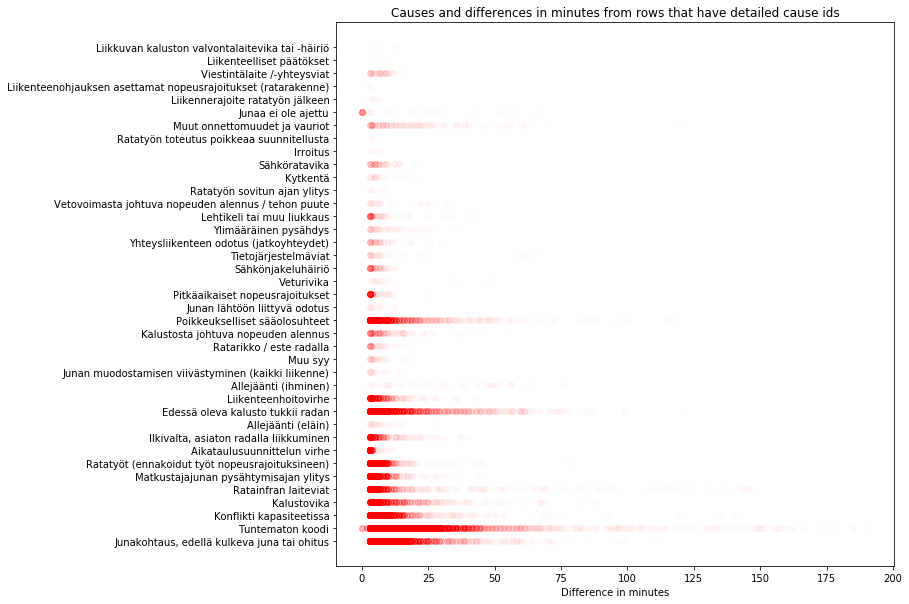

In [7]:
    
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(lateness, textual_causes, alpha=0.01, color="red")
plt.title("Causes and differences in minutes from rows that have detailed cause ids")
plt.xlabel('Difference in minutes')



Now amount is depicted by hue as well as saturation

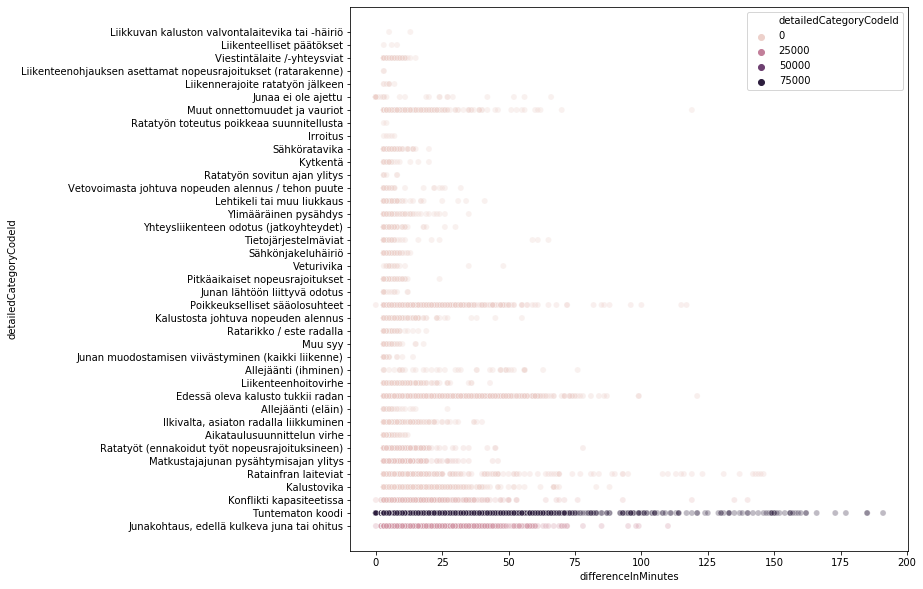

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=lateness, y=textual_causes, alpha=0.3, x_jitter=0.8, y_jitter=0.8, hue=amounts)

### Investigate difference in minutes

Load the data with trains and weather data merged

In [14]:
merged = pd.read_csv("../data/merged/trains_and_weather.csv")
#merged = merged.dropna()


In [15]:
differences = {}
for cels in merged["differenceInMinutes"].dropna().unique():
    differences[cels] = len(merged[(merged['differenceInMinutes'] == cels)])

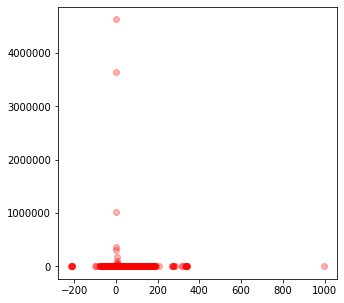

In [16]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(differences.keys(), differences.values(), color="red", alpha=0.3)

### Minutes to classes

0 = (minutes <= 0)
1 = (0 < minutes < 3)
2 = (3 <= minutes < 5)
3 = (5 <= minutes < 10)
4 = (10 <= minutes < 20)
5 = (20 <= minutes < 30)
6 = (30 <= minutes)

In [21]:
differences_classes = {}
        
differences_classes[0] = len(merged[merged["differenceInMinutes"]<=0 ])
differences_classes[1] = len(merged[(merged["differenceInMinutes"]>=0) & (merged["differenceInMinutes"]< 3)])
differences_classes[2] = len(merged[(merged["differenceInMinutes"]>=3) & (merged["differenceInMinutes"]< 5)])
differences_classes[3] = len(merged[(merged["differenceInMinutes"]>=5) & (merged["differenceInMinutes"]< 10)])
differences_classes[4] = len(merged[(merged["differenceInMinutes"]>= 10) & (merged["differenceInMinutes"]< 20)])
differences_classes[5] = len(merged[(merged["differenceInMinutes"]>=20) & (merged["differenceInMinutes"]< 30)])
differences_classes[6] = len(merged[merged["differenceInMinutes"] >= 30])
all = sum(differences_classes.values())
for luokka in differences_classes.values():
    print(luokka/all)

0.326771813261564
0.6159073011870272
0.03479938047429864
0.016253846969898417
0.004577416854723102
0.0009471042507582095
0.0007431370017304126


NameError: name 'differences_classes' is not defined

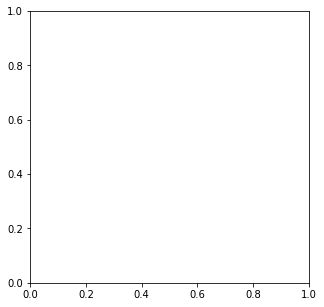

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(differences_classes.keys(), differences_classes.values(), color="red", alpha=0.5)
differences_classes.values()

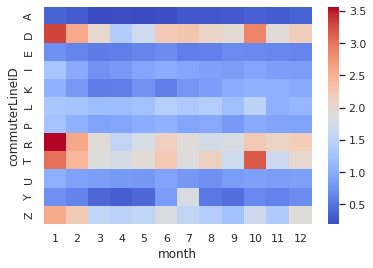

In [11]:
merged = pd.read_csv("../data/merged/trains_and_weather.csv")
dataset = merged[['commuterLineID', 'month', 'differenceInMinutes']]
data = dataset.dropna()
sns.set(style="whitegrid", color_codes=True)
#data = data.pivot("month", "day", "differenceInMinutes")

a = data.pivot_table(index='commuterLineID', 
                   columns='month', 
                   values='differenceInMinutes')#, 
                  # aggfunc='mean')

ax = sns.heatmap(a, cmap='coolwarm')

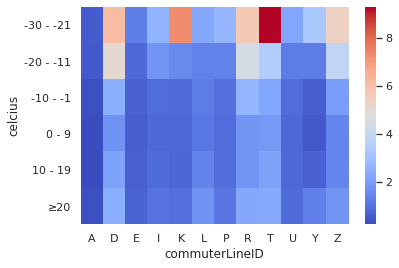

In [14]:


merged = pd.read_csv("../data/merged/trains_and_weather.csv")
dataset2 = merged[['celcius', 'commuterLineID', 'differenceInMinutes']]
merged = dataset2.dropna()
sns.set(style="whitegrid", color_codes=True)
#data = data.pivot("month", "day", "differenceInMinutes")

cel = {}
        
cel[0] = len(merged[merged["celcius"]<=-20 ])
cel[1] = len(merged[(merged["celcius"]>=-20) & (merged["celcius"]< -10)])
cel[2] = len(merged[(merged["celcius"]>=-10) & (merged["celcius"]< -5)])
cel[3] = len(merged[(merged["celcius"]>=-5) & (merged["celcius"]< 0)])
cel[4] = len(merged[(merged["celcius"]>= 0) & (merged["celcius"]< 10)])
cel[5] = len(merged[(merged["celcius"]>=10) & (merged["celcius"]< 20)])
cel[6] = len(merged[merged["celcius"] >= 20])
cel

bins = [-30, -20, -10, 0, 10, 20, 30]
labels = [f'{a0} - {a1 - 1}' for a0, a1 in zip(bins[:-2], bins[1:-1])] + [f'≥{bins[-2]}']
merged['celcius'] = pd.cut(merged['celcius'], bins=bins, labels=labels, right=False)
c = merged['celcius']


#bins = [0, 3, 6, 9, 12, 15]
#labels = [f'{a0}-{a1 - 1}' for a0, a1 in zip(bins[:-2], bins[1:-1])] + [f'≥{bins[-2]}']
#merged['rain'] = pd.cut(merged['rain'], bins=bins, labels=labels, right=False)
#w = merged['rain']

a2 = merged.pivot_table(index=c, 
                   columns='commuterLineID', 
                   values='differenceInMinutes', 
                   aggfunc='mean')

ax2 = sns.heatmap(a2, cmap='coolwarm')